# Ejercicio 1.5.6

**Eres el Científico de Datos de una importante empresa mayorista del sector turístico. La empresa tiene como negocio la creación de paquetes turísticos que luego vende a minoristas, agencias de viaje tanto online como offline. La empresa te pide lo siguiente:**

**Se ha realizado un estudio previo sobre toma de decisiones considerando los siguientes atributos y valores:**
- **Calidad del paquete:** Número de estrellas del hotel (2, 3, 4 y 5).
- **Precio:** Valores comprendidos entre 120 y 870 euros.
- **Días del paquete:** 5 o 7.
- **Aspecto del producto:** Alta o Baja.

**Se elaboró un cuestionario que planteó 8 situaciones de elección, en cada una de las cuales se presentaron 3 paquetes turísticos. A los encuestados se les solicitó escoger el paquete más atractivo en cada situación.Tanto los atributos de cada situación de elección como los resultados de las elecciones para un conjunto de individuos se encuentran en un fichero Excel adjunto al boletín. Se pide crear un modelo que, dado un conjunto de 3 paquetes, prediga cuál será el más atractivo.**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
data = pd.read_excel('problema6_dataset.xlsx', header=None)
data = data.drop([0, 1, 15]).reset_index(drop=True)
data = data.drop(columns=[0])
data.columns = data.iloc[0]
data = data[1:].reset_index(drop=True)
data['PREGUNTA'] = data.index.map(lambda x: x // 3 + 1)
data.rename(columns={data.columns[-1]: 'PUNTUACION'}, inplace=True)
data.rename(columns={data.columns[1]: 'CALIDAD'}, inplace=True)
data.rename(columns={data.columns[2]: 'PRECIO'}, inplace=True)
data

,PREGUNTA,CALIDAD,PRECIO,FUNC. EN DIAS,DESEABILIDAD,PUNTUACION
0,1,2,200,5,ALTA,0.55
1,1,2,240,7,BAJA,0.35
2,1,2,120,5,BAJA,0.10
3,2,3,400,5,ALTA,0.65
4,2,3,460,7,BAJA,0.30
5,2,3,290,5,BAJA,0.05
6,3,4,635,5,ALTA,0.75
7,3,4,680,7,BAJA,0.15
8,3,4,515,5,BAJA,0.10
9,4,5,810,5,ALTA,0.70


MSE: 0.0040
R²: 0.9055


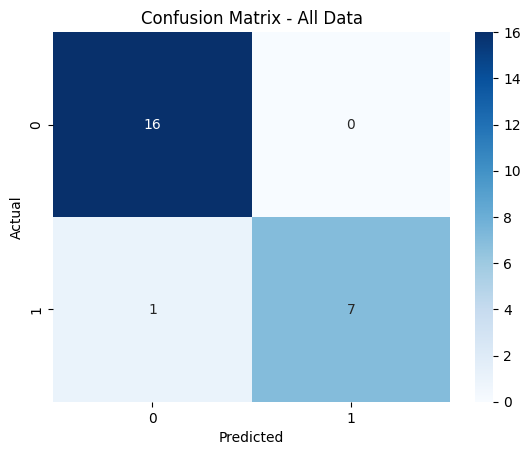

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Codificar la variable categórica "DESEABILIDAD"
le = LabelEncoder()
data['DESEABILIDAD'] = le.fit_transform(data['DESEABILIDAD'])

# Normalizar "PRECIO"
scaler = StandardScaler()
data['PRECIO'] = scaler.fit_transform(data[['PRECIO']])

# Variables predictoras y objetivo
X = data[['CALIDAD', 'PRECIO', 'FUNC. EN DIAS', 'DESEABILIDAD']]
y = data['PUNTUACION'].astype(float)

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'R²: {r2:.4f}')

# Representamos la matriz de confusión
import matplotlib.pyplot as plt

# Since confusion matrices are for classification, we binarize the continuous predictions.
# Merge actual values and predictions from both training and test sets
y_all = pd.concat([y_train, y_test])
y_all_pred = np.concatenate([y_train_pred, y_pred])

# Binarize the merged predictions and actual values
# Ensure that the threshold variable is defined
if 'threshold' not in globals():
	threshold = 0.5

y_all_bin = (y_all >= threshold).astype(int)
y_all_pred_bin = (y_all_pred >= threshold).astype(int)

cm = confusion_matrix(y_all_bin, y_all_pred_bin)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - All Data')
plt.show()